绘制散点图

获取数据

In [6]:
import matplotlib.pyplot as plt
import pandas as pd


data = pd.read_csv("C:\CodeData\pythonProject\小A的任务\田字型散点.csv", header = None)
plt.rcParams['font.sans-serif'] = ['SimHei']  
# 使用SimHei字体这样可以显示title中的中文，但这个不显示负号
plt.rcParams['axes.unicode_minus'] = False  
# 解决负号显示问题
X = data.iloc[0]
Y = data.iloc[1]


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\CodeData\\pythonProject\\小A的任务\\田字型散点.csv'

颜色获取以及对应

In [16]:
color_row = data.iloc[2]
colors = ['blue' if value == 0 else 'red' for value in color_row] # 简易写法
# colors = []    # 本质写法
# for i in color_row:
#     if i == 1:
#         colors.append("red")
#     else:
#         colors.append("blue")



画图部分

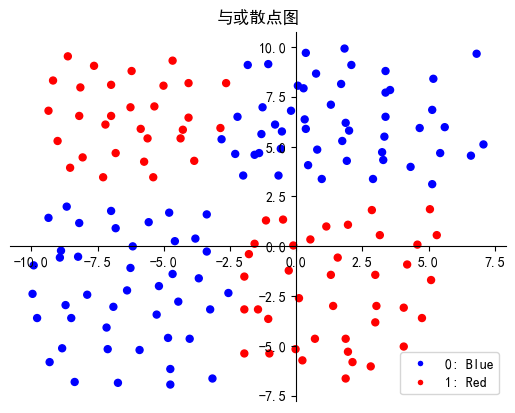

In [17]:

# 画出图的基本框架
# plt.scatter的参数设置
# 第1，2个参数是x轴和y轴的列表
# c = 是颜色参数的列表
# label = 是用于后面设置图例的标签的（这里删了也可以）
# marker = 是用于设置散点图上散点的形状的
# s = 是用于设置散点的尺寸大小的
scatter = plt.scatter(X, Y, c = colors, label = 'Legend', marker='o', s = 25)



# 将原点移到绘图界面中心
# 这两行代码的目的是在图上添加坐标轴的参考线，将直线添加到图中心
# 第一个参数表示坐标的值，第二个参数表示颜色，第三个为设置参数
plt.axhline(0, color = 'black', linewidth = 0.5) # 水平
plt.axvline(0, color = 'black', linewidth = 0.5) # 垂直

# 设置坐标轴原点在绘图界面中心
"""
plt.gca(): 这是获取当前坐标轴的函数,gca 代表 "get current axis"。

spines['left'].set_position('zero'): 这一行代码设置左边的坐标轴(y 轴)的位置为原点。
spines 表示坐标轴的四个边，'left' 表示左边的边。set_position('zero') 将左边的坐标轴移动到原点。

spines['bottom'].set_position('zero'): 这一行代码设置底部的坐标轴(x 轴)的位置为原点。
同样,set_position('zero') 将底部的坐标轴移动到原点。

spines['right'].set_color('none') 和 spines['top'].set_color('none'):
 这两行代码将右边和顶部的坐标轴的颜色设置为 'none'，即不显示。
 因为我们通常只需要左边和底部的坐标轴来表示数据的正负方向，而右边和顶部的坐标轴可以不显示，
 从而使图更简洁。


"""
plt.gca().spines['left'].set_position('zero')
plt.gca().spines['bottom'].set_position('zero')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
# 显示图例
# handles, labels = scatter.legend_elements()
# 手动设置图例中的图标

"""
plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=5): 
这是创建一个线的对象，实际上用于表示散点的图例。参数解释如下：

marker='o': 指定标记的形状为圆圈。
color='w': 指定线的颜色为白色，这里是为了让标记看起来是圆形。
markerfacecolor=color: 指定标记的填充颜色，这里使用循环变量 color,分别表示蓝色和红色。
markersize=5: 指定标记的大小为 5。
[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=5) for color in ['blue', 'red']]: 
这是使用列表推导式创建了一个包含两个图例对象的列表，分别对应蓝色和红色。


"""

handles = [plt.Line2D([0], [0], marker = 'o', color = 'w', markerfacecolor=color, markersize=5) for color in ['blue', 'red']]
labels = ['0: Blue', '1: Red']
plt.legend(handles, labels) # 图例，标签

plt.title("与或散点图")


plt.show()

折线图


[   0.  100.  200.  270.  470.  600. 1000.   nan]
[ 0.    38.025 42.632 41.292 35.931 32.704 23.472    nan]


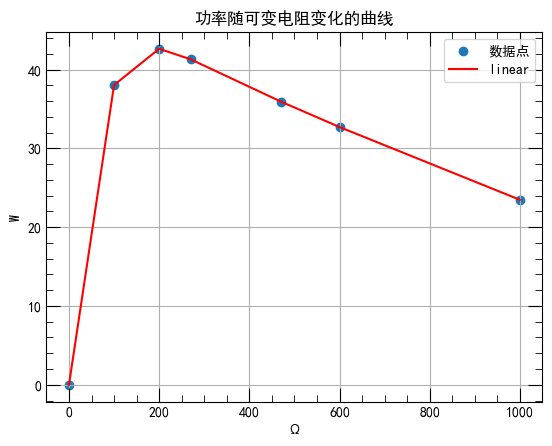

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# 设置字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取Excel文件
data = pd.read_excel("C:\\Users\\lmz\\Desktop\\实验报告汇总\\电路\\实验报告\\实验3.xlsx", header=None)

x = data.iloc[0].values
y = data.iloc[3].values
"""
# 提取第2行的第5个点和第4行的第5个点作为x和y
x_point = data.iloc[1, 4]
y_point = data.iloc[3, 4]

# 提取第2列和第4列作为x和y
x = data.iloc[:, 1].values  # 第2列
y = data.iloc[:, 3].values  # 第4列
"""
# 打印数据以检查
print(x)
print(y)

# 清理数据，移除NaN和无穷大值
mask = ~np.isnan(x) & ~np.isnan(y) & ~np.isinf(x) & ~np.isinf(y)
x = x[mask]
y = y[mask]

# 确保数据非空
if len(x) == 0 or len(y) == 0:
    raise ValueError("数据行为空，请检查数据文件。")

# 绘制散点图
plt.scatter(x, y, label='数据点')

# 绘制平滑曲线
plt.plot(x, y, label='linear', color='red')

plt.grid(True)  # 显示格线
plt.minorticks_on()  # 开启次刻度线
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)
plt.tick_params(axis='both', which='major', length=10)  # 主刻度线长度
plt.tick_params(axis='both', which='minor', length=5)  # 次刻度线长度
# 设置图像标签和标题
plt.xlabel('Ω')
plt.ylabel('W')
plt.title('功率随可变电阻变化的曲线')
plt.legend()
plt.show()


线性拟合

B = 20.003683677362485, A = -0.07143702885110415


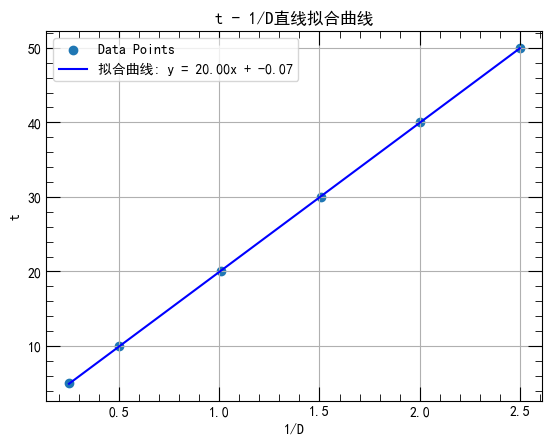

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 设置中文显示和负号显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取Excel文件
data = pd.read_excel("C:\\Users\\lmz\\Desktop\\实验报告汇总\\电路\\实验报告\\实验2.xlsx", header=None)

# 第2行作为x，第4行作为y
x = data.iloc[3].values
y = data.iloc[2].values

# 清理数据，移除NaN和无穷大值
mask = ~np.isnan(x) & ~np.isnan(y) & ~np.isinf(x) & ~np.isinf(y)
x = x[mask]
y = y[mask]

# 绘制散点图
plt.scatter(x, y, label='Data Points')

# 线性拟合
coefficients = np.polyfit(x, y, 1)
linear_fit = np.poly1d(coefficients)


# 输出线性拟合的斜率和截距
slope, intercept = coefficients
print(f"B = {slope}, A = {intercept}")

# 计算拟合曲线的函数值
fit_y = linear_fit(x)

# 绘制拟合函数的曲线
plt.plot(x, fit_y, label=f'拟合曲线: y = {slope:.2f}x + {intercept:.2f}', color='blue')

# 设置格线和轴分辨率
plt.grid(True)  # 显示格线
plt.minorticks_on()  # 开启次刻度线
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)
plt.tick_params(axis='both', which='major', length=10)  # 主刻度线长度
plt.tick_params(axis='both', which='minor', length=5)  # 次刻度线长度

# 设置图像标签和标题
plt.xlabel('1/D')
plt.ylabel('t')
plt.title('t - 1/D直线拟合曲线')
plt.legend()
plt.show()


平滑曲线绘制

[308.15 313.15 318.15 323.15 328.15 333.15 338.15 343.15 348.15 353.15]
[  0.    9.   19.9  30.   42.3  53.9  65.5  78.5  88.8 100. ]


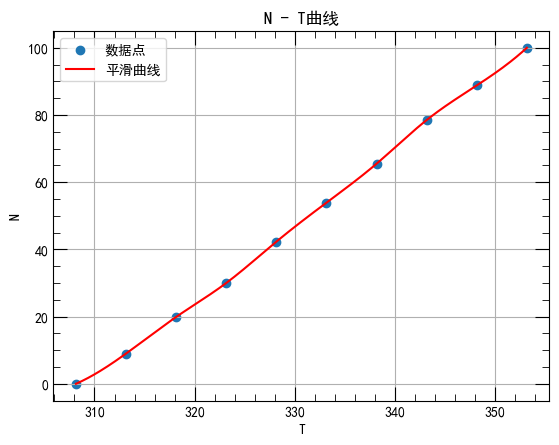

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# 设置字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取Excel文件
data = pd.read_excel("C:\\Users\\lmz\\Desktop\\实验报告汇总\\大物\\data20.xlsx", header=None)

# 第1行作为x，第3行作为y
x = data.iloc[0].values
y = data.iloc[4].values

# 打印数据以检查
print(x)
print(y)

# 清理数据，移除NaN和无穷大值
mask = ~np.isnan(x) & ~np.isnan(y) & ~np.isinf(x) & ~np.isinf(y)
x = x[mask]
y = y[mask]

# 确保数据非空
if len(x) == 0 or len(y) == 0:
    raise ValueError("数据行为空，请检查数据文件。")

# 绘制散点图
plt.scatter(x, y, label='数据点')

# 使用样条插值平滑曲线
x_new = np.linspace(np.min(x), np.max(x), 300)  # 创建更多的x值用于平滑曲线
spl = make_interp_spline(x, y, k=3)  # k=3表示三次样条插值
y_new = spl(x_new)

# 绘制平滑曲线
plt.plot(x_new, y_new, label='平滑曲线', color='red')

plt.grid(True)  # 显示格线
plt.minorticks_on()  # 开启次刻度线
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)
plt.tick_params(axis='both', which='major', length=10)  # 主刻度线长度
plt.tick_params(axis='both', which='minor', length=5)  # 次刻度线长度
# 设置图像标签和标题
plt.xlabel('T')
plt.ylabel('N')
plt.title('N - T曲线')
plt.legend()
plt.show()


指数拟合

指数拟合参数: a = -9.97410912428335e-15, b = 0.9999999992461853, c = 1.0


d:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


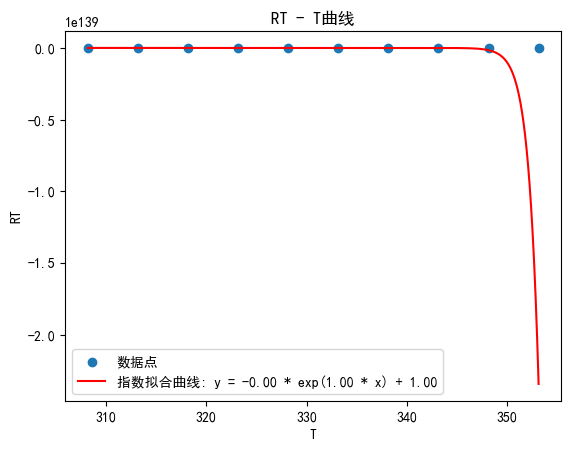

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 设置字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取Excel文件
data = pd.read_excel("C:\\Users\\lmz\\Desktop\\实验报告汇总\\大物\\data20.xlsx", header=None)

# 第1行作为x，第3行作为y
x = data.iloc[0].values
y = data.iloc[2].values

# 清理数据，移除NaN和无穷大值
mask = ~np.isnan(x) & ~np.isnan(y) & ~np.isinf(x) & ~np.isinf(y)
x = x[mask]
y = y[mask]

# 确保数据非空
if len(x) == 0 or len(y) == 0:
    raise ValueError("数据行为空，请检查数据文件。")

# 绘制散点图
plt.scatter(x, y, label='数据点')

# 指数函数拟合
def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

# 拟合参数
params, covariance = curve_fit(exponential_func, x, y)
a, b, c = params

# 打印拟合参数
print(f"指数拟合参数: a = {a}, b = {b}, c = {c}")

# 计算拟合曲线上的点
x_fit = np.linspace(np.min(x), np.max(x), 300)
y_fit = exponential_func(x_fit, a, b, c)

# 绘制拟合曲线
plt.plot(x_fit, y_fit, label=f'指数拟合曲线: y = {a:.2f} * exp({b:.2f} * x) + {c:.2f}', color='red')

# 设置图像标签和标题
plt.xlabel('T')
plt.ylabel('RT')
plt.title('RT - T曲线')
plt.legend()
plt.show()
